# HW3

<b>Instructions:</b> Write your answers in the empty code cells below.

<b>Penalties:</b> You will incur penalties if:
<ul>
<li>Your code is wrong</li>
<li>Your code does not work on different data</li>
<li>You use for loops (unless explicitly permitted)</li>
</ul>

## Problem

Start by executing the following code, which creates a Series object <b>stock</b> of share prices of Nvidia. 

In [6]:
import pandas as pd
import numpy as np
#data = pd.read_csv('NVDA.csv',index_col=0, parse_dates=True)
data = pd.read_csv('NVDA.csv',index_col=0)
data.index=data.index.astype('datetime64[ns]')

stock = data['Close']

In [7]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [8]:
# Set to 2 decimal places, and display all columns (and up to 300 rows)
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', 300)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<Axes: xlabel='Date'>

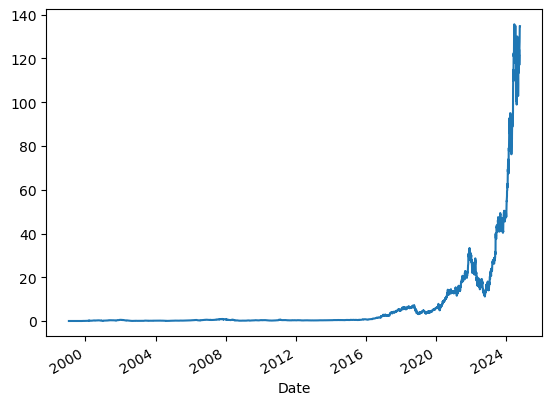

In [9]:
%pylab inline
stock.plot()

In [10]:
stock.head()
stock.tail()

Date
1999-01-22    0.041016
1999-01-25    0.045312
1999-01-26    0.041797
1999-01-27    0.041667
1999-01-28    0.041536
Name: Close, dtype: float64

Date
2024-10-07    127.72
2024-10-08    132.89
2024-10-09    132.65
2024-10-10    134.81
2024-10-11    134.80
Name: Close, dtype: float64

Use the Series <i>stock</i> to answer the following questions.

## Question 1

### Q1.1, When is the first date this stock closed at more than 33 dollars? (pick the closest date in Camino)

In [14]:
stock[stock.values > 33].index[0]

Timestamp('2021-11-29 00:00:00')

### Q1.2, After stock price hit 33 dollar, how many trading days and how many calendar days it took to reach the same value? (pick the closest number of days in Camino)

In [16]:
FirstDay_hit33 = stock[stock.values >= 33].index[0]
FirstDay_hit33

Timestamp('2021-11-29 00:00:00')

In [17]:
Date_hit_33_again = stock[stock.values >= 33].index[1]
Date_hit_33_again

Timestamp('2023-05-25 00:00:00')

In [18]:
stock_33_33Again = stock[FirstDay_hit33 : Date_hit_33_again]
stock_33_33Again.head(1)
stock_33_33Again.tail(1)

Date
2021-11-29    33.376001
Name: Close, dtype: float64

Date
2023-05-25    37.979999
Name: Close, dtype: float64

In [19]:
#Trading days it took to hit that value again
len(stock_33_33Again)

375

In [20]:
#Calendar days it took to hit that value again
Date_hit_33_again - FirstDay_hit33

Timedelta('542 days 00:00:00')

### Question 2

### If we calculate the stock price based on 30 days rolling window. When is the first day the price hit over 80 ? (pick the closest date in Camino)

In [23]:
rolling_30_mean = stock.rolling(30).mean()

In [24]:
rolling_30_mean[rolling_30_mean > 80].index[0]

Timestamp('2024-03-20 00:00:00')

## Question 3

###  With following investment strategy: buy on day 1(day x), sell on day 3(day x+2). If based on this strategy, what's the most dollars amount you can **lose** in one trading?  Also report the buying and selling date for that particular trade. ( pick the closest dollar amount it dropped in Camino)

In [27]:
stock.head()
stock.shift(-2).head()

Date
1999-01-22    0.041016
1999-01-25    0.045312
1999-01-26    0.041797
1999-01-27    0.041667
1999-01-28    0.041536
Name: Close, dtype: float64

Date
1999-01-22    0.041797
1999-01-25    0.041667
1999-01-26    0.041536
1999-01-27    0.039583
1999-01-28    0.040365
Name: Close, dtype: float64

In [28]:
(stock.shift(-2) - stock).nsmallest()

Date
2024-08-30   -13.16
2024-06-20   -12.67
2024-08-27   -10.71
2024-07-15   -10.45
2024-07-23   -10.31
Name: Close, dtype: float64

In [29]:
ThreeDays_drop_max = (stock.shift(-2) - stock).nsmallest(1).values[0]
ThreeDays_drop_max

-13.16000000000001

In [30]:
FirstDay = (stock.shift(-2)-stock).nsmallest(1).index[0]
FirstDay

Timestamp('2024-08-30 00:00:00')

In [31]:
stock[stock.index >= FirstDay].head()

Date
2024-08-30    119.37
2024-09-03    108.00
2024-09-04    106.21
2024-09-05    107.21
2024-09-06    102.83
Name: Close, dtype: float64

In [32]:
ThirdDay = stock[stock.index >= FirstDay].index[2]
ThirdDay

Timestamp('2024-09-04 00:00:00')

In [33]:
print("The buying date is " + str(FirstDay))
print("The selling date is " + str(ThirdDay) )
print("Total dollar lost is $" + str(abs(ThreeDays_drop_max)) )

The buying date is 2024-08-30 00:00:00
The selling date is 2024-09-04 00:00:00
Total dollar lost is $13.16000000000001


Manually verify the stock price close to those 3 days

In [35]:
stock[FirstDay:ThirdDay]

Date
2024-08-30    119.37
2024-09-03    108.00
2024-09-04    106.21
Name: Close, dtype: float64

## Question 4

### <b>Consider only the dates from 2020 till most recent</b>. In which day did we observe that the price has increased of more than 50% within the 20 preceding trading days? What's the date and what's the actual gain % ? (pls verify it)
#### *Hint:* use a **rolling** minimum. Today + 19 more days -> use rolling(20). (pick the closest date that has the highest gain ratio in Camino) 

In [38]:
stock_2020_now = stock[stock.index >= '2020']

<Axes: xlabel='Date'>

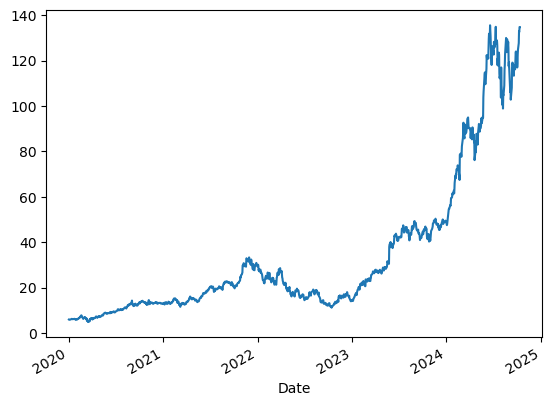

In [39]:
stock_2020_now.plot()

<div class="alert alert-block alert-success"> Solution Note </div>

**Solution Note:** Today + 19 more days -> use rolling(20).  Use stock.rolling(20).min() to find the lowest point within that 20 days windows(rol_min). Price increase is -> (everyday price - rol_min), for increase ratio, need to divided based on the lowest price so it is (everyday price - rol_min)/rol_min. 

Create a boolean mask which satisfy the 50% increase, then bring the boolean mask back to the increase % formula.

In [42]:
rol_min=stock_2020_now.rolling(20).min()

In [43]:
gain_boolean_mask = ((stock_2020_now - rol_min)/rol_min) > 0.5

In [44]:
(gain_boolean_mask).sum()

1

In [45]:
#the date the the value of this more than 50% gain happened
stock_2020_now[gain_boolean_mask]

Date
2023-02-02    21.709
Name: Close, dtype: float64

In [46]:
#the minimal value in that period of time
rol_min[gain_boolean_mask].values[0]

14.2649994

In [47]:
# find the date has this value
stock_2020_now[stock_2020_now == rol_min[gain_boolean_mask].values[0]]

Date
2023-01-05    14.264999
Name: Close, dtype: float64

In [48]:
#verify
stock_gain_50_percent = stock_2020_now[(stock_2020_now.index >='2023-01-05') & (stock_2020_now.index <= '2023-02-02')]

In [49]:
stock_gain_50_percent

Date
2023-01-05    14.264999
2023-01-06    14.859000
2023-01-09    15.628000
2023-01-10    15.909000
2023-01-11    16.000999
2023-01-12    16.511000
2023-01-13    16.899000
2023-01-17    17.702000
2023-01-18    17.377000
2023-01-19    16.764999
2023-01-20    17.839000
2023-01-23    19.192999
2023-01-24    19.264999
2023-01-25    19.323000
2023-01-26    19.802000
2023-01-27    20.364999
2023-01-30    19.162000
2023-01-31    19.537000
2023-02-01    20.942999
2023-02-02    21.709000
Name: Close, dtype: float64

In [50]:
selling_price = stock_gain_50_percent.tail(1).values[0]
selling_price
buying_price = stock_gain_50_percent.head(1).values[0]
buying_price

21.7089996

14.2649994

In [51]:
profit_ratio = (selling_price - buying_price) / buying_price
profit_ratio

0.5218366991308809

In [52]:
print('If you buy on ' + str(stock_gain_50_percent.head(1).index[0]) + '\n')
print('and sell on ' + str(stock_gain_50_percent.tail(1).index[0]) + '\n')
print('then you made ' + str(profit_ratio * 100) + '%' + ' profit')

If you buy on 2023-01-05 00:00:00

and sell on 2023-02-02 00:00:00

then you made 52.183669913088096% profit


## Question 5

### <b>Consider only the dates from 2020 till most recent</b>. What was the **worst** possible "buy&sell" operation? Find the two days x and y so that the % loss resulting from buying in x and selling in y (with y after x) is maximized. Your code should work for any data. 
#### *Hint:* Use method cummax() or method cummin(). *Cummax/Cummin* returns the maximum/minimum value encountered so far. Make sure to return the trading days x and y, as well as the % loss resulting from buying in x and selling in y.

#### (Fill in blank for the buying and selling dates in Camino with the format 'buying-date/selling-date' (for example, for example, 2021-01-01/2022-01-31)

<div class="alert alert-block alert-success"> Solution Note </div>

**Solution Note** . Need to 'buy'(high) first, then 'sell'(low) later. High need to be historic high. .cummax will hold the highest price history, So the cummax will be the buying date and current be the selling date. When use .cummax, should be (cummax - current)/current if take .nlargest(1), then that's our selling date info.

### Use cummax()

Need to buy high then sell low. Buy need to happen first. High need to be historic high, so use cummax() without flipping the date.

In [59]:
stock_2020_now[:10]
stock_2020_now.cummax()[:10]

Date
2020-01-02    5.99775
2020-01-03    5.90175
2020-01-06    5.92650
2020-01-07    5.99825
2020-01-08    6.00950
2020-01-09    6.07550
2020-01-10    6.10800
2020-01-13    6.29950
2020-01-14    6.18200
2020-01-15    6.13925
Name: Close, dtype: float64

Date
2020-01-02    5.99775
2020-01-03    5.99775
2020-01-06    5.99775
2020-01-07    5.99825
2020-01-08    6.00950
2020-01-09    6.07550
2020-01-10    6.10800
2020-01-13    6.29950
2020-01-14    6.29950
2020-01-15    6.29950
Name: Close, dtype: float64

In [60]:
max_from_now = stock_2020_now.cummax()

To get the selling date y1 ..

In [62]:
y1 = ((max_from_now - stock_2020_now)/ stock_2020_now).nlargest(1).index[0]
y1

Timestamp('2022-10-14 00:00:00')

Or ..

In [64]:
y1 = ((stock_2020_now - max_from_now)/ stock_2020_now).nsmallest(1).index[0]
y1
stock_2020_now[y1]

Timestamp('2022-10-14 00:00:00')

11.2269997

To get the buying date x1 ..

In [66]:
x1 = stock_2020_now[stock_2020_now == max_from_now[y1]].index[0]
x1
stock_2020_now[x1]

Timestamp('2021-11-29 00:00:00')

33.376001

In [67]:
print('The worst buy & sell combination is:\n')
print('First buy on ' + str(x1) +', when the price was ' + 
      str(stock_2020_now[x1]))
print('Then sell on ' + str(y1) +', when the price was ' +
      str(stock_2020_now[y1]))
print('The loss is ' + str((stock_2020_now[x1] - stock_2020_now[y1]) * 100 / stock_2020_now[x1]) + 
      '%')

The worst buy & sell combination is:

First buy on 2021-11-29 00:00:00, when the price was 33.376001
Then sell on 2022-10-14 00:00:00, when the price was 11.2269997
The loss is 66.36205847429115%


### Use cummin()

<div class="alert alert-block alert-success"> Solution Note </div>

**Solution Notes**: Buy high then sell low.
If use .cummin(). Need to know lowest in the future, so need to flip the stock, most recent dated first. If don't flip, .cummin() will return the 'history' low, which is not helpful.

After know the future low, so "(current-future low)/current" will be the delta, then take .nlargest(1), that will be our buying date. 

Sort from the last day to the first, and for each day compute cummin: in this way, for each trading day x we compute the minimum price on or after day x

In [72]:
minimum_from_now_on = stock_2020_now.sort_index(ascending=False).cummin()

In [73]:
stock_2020_now.sort_index(ascending=False)[:10]

Date
2024-10-11    134.80
2024-10-10    134.81
2024-10-09    132.65
2024-10-08    132.89
2024-10-07    127.72
2024-10-04    124.92
2024-10-03    122.85
2024-10-02    118.85
2024-10-01    117.00
2024-09-30    121.44
Name: Close, dtype: float64

In [74]:
minimum_from_now_on[:10]

Date
2024-10-11    134.80
2024-10-10    134.80
2024-10-09    132.65
2024-10-08    132.65
2024-10-07    127.72
2024-10-04    124.92
2024-10-03    122.85
2024-10-02    118.85
2024-10-01    117.00
2024-09-30    117.00
Name: Close, dtype: float64

Find the trading day x where buying in x and selling at the worst future day maximimizes the loss

In [76]:
x = ((stock_2020_now - minimum_from_now_on) / stock_2020_now).nlargest(1).index[0]
x
stock_2020_now[x]

Timestamp('2021-11-29 00:00:00')

33.376001

Find the trading day y when to sell

In [78]:
y = stock_2020_now[stock_2020_now == minimum_from_now_on[x]].index[0]
y
stock_2020_now[y]

Timestamp('2022-10-14 00:00:00')

11.2269997

In [79]:
print('The worst buy & sell combination is:\n')
print('First buy on ' + str(x) +', when the price was ' + 
          str(stock[x]))
print('Then sell on ' + str(y) +', when the price was ' + 
          str(stock[y]))
print('The loss is ' + str((stock[x] - stock[y]) * 100 / stock[x]) + '%')

The worst buy & sell combination is:

First buy on 2021-11-29 00:00:00, when the price was 33.376001
Then sell on 2022-10-14 00:00:00, when the price was 11.2269997
The loss is 66.36205847429115%
